Задачи:

Загрузите файл HR.csv в pandas dataframe

Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)

Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

Рассчитайте сколько сотрудников работает в каждом департаменте.

Показать распределение сотрудников по зарплатам.

Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

●Доля сотрудников с повышением за последние 5 лет

●Средняя степень удовлетворенности

●Среднее количество проектов

Разделить данные на тестовую и обучающую выборки.Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).Оценить качество модели на тестовой выборке

Загрузить jupyter notebook с решением на github и прислать ссылку


Признаки:

1.satisfaction_level​ - Уровень удовлетворенности работой

2.Last_evaluation ​- Время с момента последней оценки в годах

3.number_projects​ - Количество проектов, выполненных за время работы

4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц

5.time_spend_company​ - Стаж работы в компании в годах

6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником

7.left​ - уволился ли сотрудник

8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет

9.department ​- отдел в котором работает сотрудник

10.salary​ - относительный уровень зарплаты

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [152]:
df = pd.read_csv('HR.csv')

In [153]:
#основные статистики
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [154]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
#корреляционная матрица
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

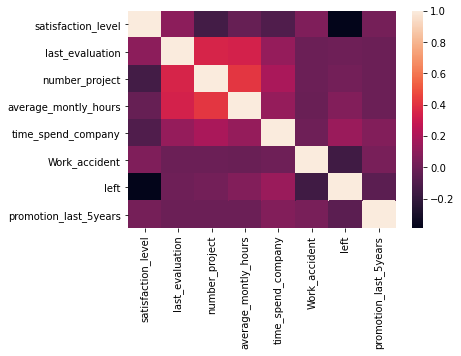

In [156]:
sns.heatmap(df.corr())

Наиболее скоррелированными переменными являются average_montly_hours и number_project. Наименее - average_montly_hours и satisfaction_level.

In [157]:
#количество сотрудников в каждом департаменте
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

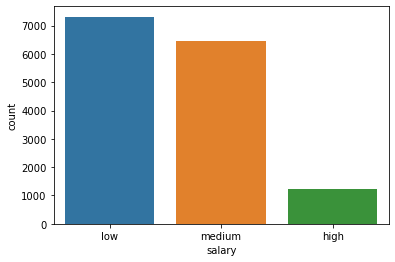

In [158]:
#распределение сотрудников по зарплатам
sns.countplot(x='salary', data=df)
plt.show()

In [159]:
#распределение сотрудников по зарплатам в каждом департаменте 
department_gr = df.groupby(['salary','department']).count()
department_gr = department_gr.filter(items = ['salary','department','satisfaction_level'])

<AxesSubplot:xlabel='salary'>

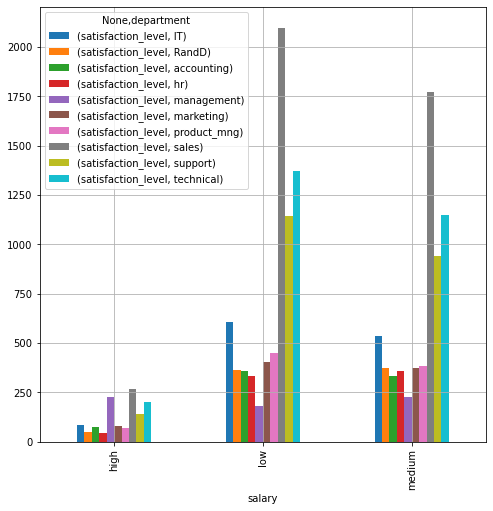

In [160]:
department_gr.unstack().plot(kind='bar', figsize = [8,8], fontsize =10, grid = True)

Проверка гипотезы, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом:

In [161]:
def salary_hypothesis(high, low):
    if high > low:
        print('Гипотеза подтверждена')
    else:
        print('Гипотеза не подтверждена')


hours = df.groupby('salary')['average_montly_hours'].mean()
hours

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64

In [162]:
salary_hypothesis(hours['high'], hours['low'])

Гипотеза не подтверждена


In [163]:
left = df[df['left']==1]
work = df[df['left']==0]

In [164]:
#доля сотрудников с повышением за последние 5 лет среди уволившихся
notpromoted, promoted = left['promotion_last_5years'].value_counts()
promoted / (notpromoted + promoted) * 100

0.5320638476617194

In [165]:
#доля сотрудников с повышением за последние 5 лет среди оставшихся
notpromoted, promoted = work['promotion_last_5years'].value_counts()
promoted / (notpromoted + promoted) * 100

2.6251312565628284

In [166]:
#средняя степень удовлетворенности уволившихся
left.satisfaction_level.mean()

0.44009801176140917

In [167]:
#средняя степень удовлетворенности оставшихся
work.satisfaction_level.mean()

0.666809590479516

In [168]:
#среднее количество проектов сотрудников, которые уволились
left.number_project.mean()

3.8555026603192384

In [169]:
#среднее количество проектов сотрудников, которые остались
work.number_project.mean()

3.786664333216661

# LDA

In [170]:
df_lda = df.drop(['department', 'salary'], axis=1)

data_train, data_test = train_test_split(df_lda, test_size=0.25)
y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']

lda = LinearDiscriminantAnalysis()

In [171]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis()

In [172]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T

In [173]:
result

,0,1
0,0,0
1,0,1
2,0,0
3,0,1
4,1,1
...,...,...
3745,0,1
3746,0,0
3747,0,0
3748,0,0


In [175]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(data_test))

0.7704

Прогноз модели увольнения сотрудника на основе имеющихся факторов равен 77%. 